Zadanie 1. 
1.1.Import  modułów  (należy  zaimportować  klasę  LogisticRegression  z  biblioteki 
sklearn.linear_model).

In [95]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

1.2.  Otwarcie  pliku  z  danymi  (titanic_train.csv).  Należy  zaimportować  nazwy  kolumn 
i stworzyć obiekt df. 

In [96]:
df = pd.read_csv('titanic_train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.3. Sprawdzenie podstawowych statystyk. 
1.4. Sprawdzenie kompletności danych.

In [97]:
print(df.describe())
print(df.isnull().sum())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

1.5. Wizualizacja: 
 1.5.1. Podział liczby osób ze względu na przetrwanie katastrofy, 

C:\Users\DELL\AppData\Local\Temp\ipykernel_5232\624183341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette=['#d9534f', '#5cb85c'])


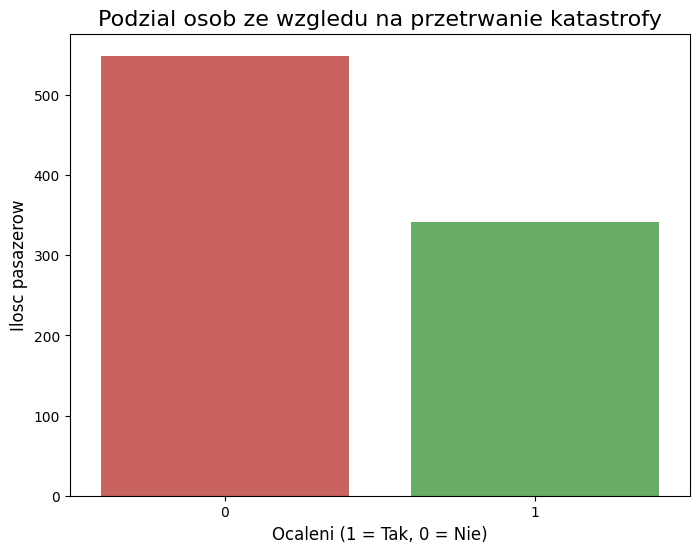

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', palette=['#d9534f', '#5cb85c'])

plt.title('Podzial osob ze wzgledu na przetrwanie katastrofy', fontsize=16)
plt.xlabel('Ocaleni (1 = Tak, 0 = Nie)', fontsize=12)
plt.ylabel('Ilosc pasazerow', fontsize=12)

plt.show()


1.5.2. Podział przeżycia osób względem płci

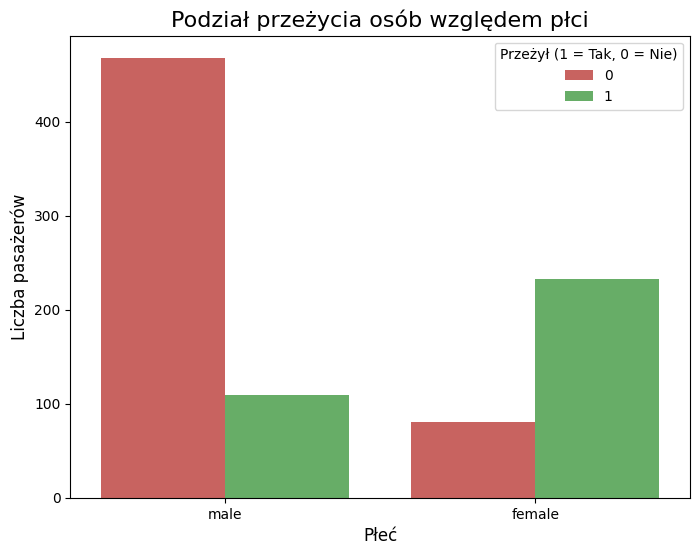

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette=['#d9534f', '#5cb85c'])

plt.title('Podział przeżycia osób względem płci', fontsize=16)
plt.xlabel('Płeć', fontsize=12)
plt.ylabel('Liczba pasażerów', fontsize=12)
plt.legend(title='Przeżył (1 = Tak, 0 = Nie)', loc='upper right')

plt.show()

1.5.3. Podział przeżycia osób, względem klasy biletów

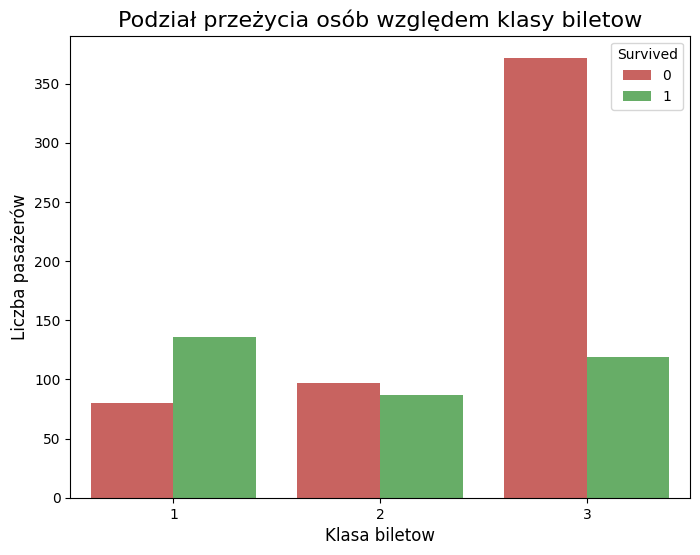

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette=['#d9534f', '#5cb85c'])

plt.title('Podział przeżycia osób względem klasy biletow', fontsize=16)
plt.xlabel('Klasa biletow', fontsize=12)
plt.ylabel('Liczba pasażerów', fontsize=12)

plt.show()

1.5.4. Podział pasażerów ze względu na wiek

C:\Users\DELL\AppData\Local\Temp\ipykernel_5232\2629748681.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Age', bins=30, palette=['#d9534f', '#5cb85c'])


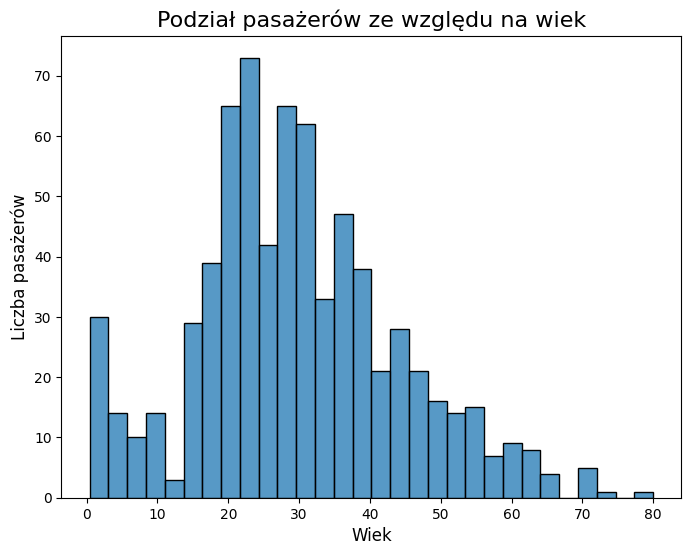

In [101]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=30, palette=['#d9534f', '#5cb85c'])

plt.title('Podział pasażerów ze względu na wiek', fontsize=16)
plt.xlabel('Wiek', fontsize=12)
plt.ylabel('Liczba pasażerów', fontsize=12)

plt.show()

1.5.5. Podział pasażerów ze względu liczbę współpasażerów z rodziny

C:\Users\DELL\AppData\Local\Temp\ipykernel_5232\2015607186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rodzina', palette='Blues')


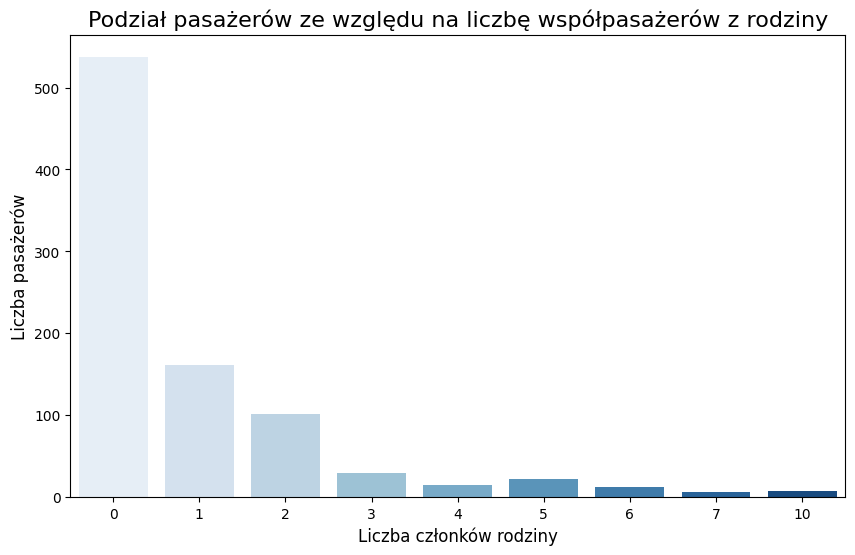

In [102]:
df['Rodzina'] = df['SibSp'] + df['Parch']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Rodzina', palette='Blues')

plt.title('Podział pasażerów ze względu na liczbę współpasażerów z rodziny', fontsize=16)
plt.xlabel('Liczba członków rodziny', fontsize=12)
plt.ylabel('Liczba pasażerów', fontsize=12)

plt.show()

1.5.6. Podział biletów ze względu na cenę

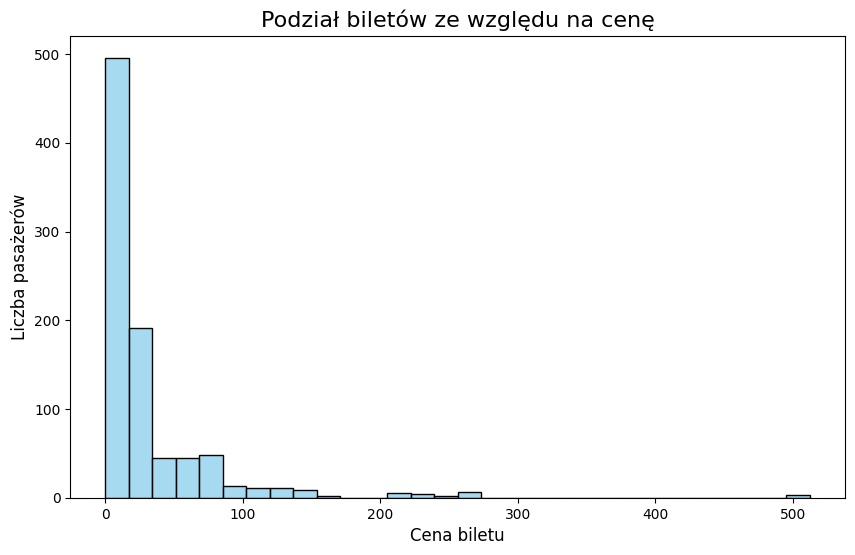

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', bins=30, color='skyblue')

plt.title('Podział biletów ze względu na cenę', fontsize=16)
plt.xlabel('Cena biletu', fontsize=12)
plt.ylabel('Liczba pasażerów', fontsize=12)

plt.show()

## 2. Przygotowanie danych: 
2.1. Sprawdzenie brakujących danych.

In [104]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Rodzina          0
dtype: int64


### 2.2. Wizualizacja: 
 2.2.1. Heatmapa ze względu na liczbę brakujących danych. 

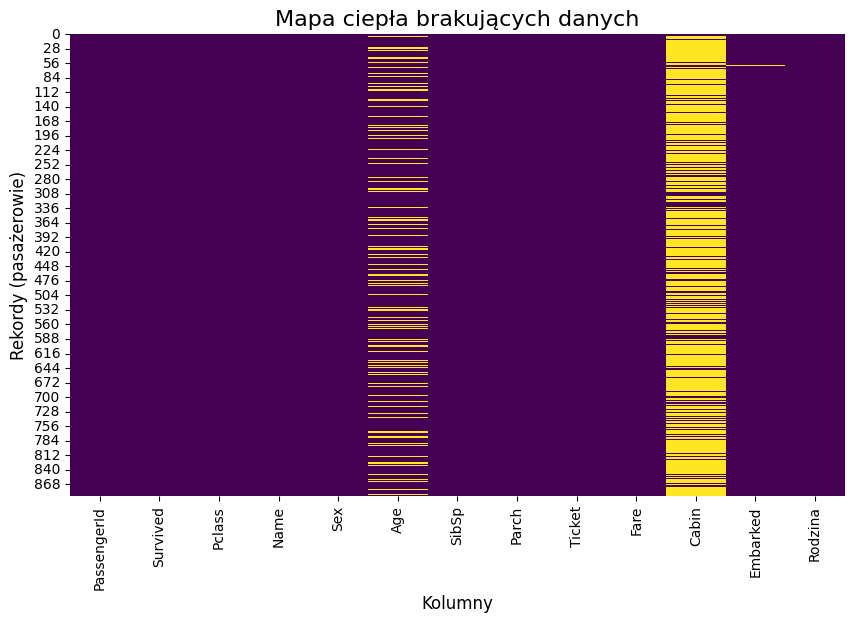

In [105]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa ciepła brakujących danych', fontsize=16)
plt.xlabel('Kolumny', fontsize=12)
plt.ylabel('Rekordy (pasażerowie)', fontsize=12)

plt.show()

### 2.3. Data Cleaning: 
2.3.1. Age - trzeba uzupełnić brakujące dane

In [106]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5232\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


2.3.2. Cabin - usunąć kolumnę (usunięcie całego atrybutu)

In [107]:
df.drop('Cabin', axis=1, inplace=True)

2.3.3. Embarked - usunąć wiersz NaN.

In [108]:
df.dropna(subset=['Embarked'], inplace = True)

### 2.4. Przekształcenie danych kategorialnych: 
 2.4.1. Dummying: płeć i miejsce wejścia na pokład.

In [109]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Rodzina  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500        1       False        True  
1          PC 17599  71.2833        1       False       False  
2  STON/O2. 3101282   7.9250        0       False        True  
3            113803  53.1000        1   

2.4.2. Usunięcie kolumn 'Sex', 'Embarked', 'Name', 'Ticket' z danych

In [110]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

2.4.3. Stworzenie obiektu df_titanic z przetworzonych danych treningowych + zmienna 
dotycząca płci + zmienna dotycząca embark.

In [111]:
df_titanic = df.copy()

2.4.4. Usunięcie kolumny 'PassengerId'

In [112]:
df_titanic.drop(columns=['PassengerId'], inplace=True)

### 3. Podział zbioru danych na treningowy i testowy: 
3.1. Do zmiennej X należy zapisać wszystkie kolumny z zestawu danych df_titanic (macierz 
cech) oprócz kolumny Survived (można skorzystać z metody drop z argumentem axis=1). 

In [113]:
X = df_titanic.drop(columns=['Survived'], axis=1)


3.2. Do zmiennej y należy zapisać dane z kolumny Survived

In [114]:
y = df_titanic['Survived']

3.3. Do zmiennych X_train, X_test, y_train, y_test należy zapisać dane powstałe z podziału 
X i y na dane uczące i testowe (z biblioteki sklearn.model_selection należy zaimportować 
train_test_split). Zbiór testowy ma stanowić 20% zbioru danych, a random_state = 101)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (711, 9)
X_test shape: (178, 9)
y_train shape: (711,)
y_test shape: (178,)


### 4. Wybór modelu: 
Należy stworzyć obiekt regresji logistycznej lr_model. Dla obiektu lr_model należy wywołać 
metodę fit(), która ma nauczyć model w jaki sposób odgadywać, czy dany pasażer statku Titanic 
przeżył katastrofę.

In [116]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

5.  Wykorzystanie  wytrenowanego  modelu  do  prognozowania  wyników  dla  nowych 
przypadków. W zmiennej y_pred należy zapisać wynik predykcji dla X_test. 

In [117]:
y_pred = lr_model.predict(X_test)

### 6. Ewaluacja modelu: 
 
6.1. Ewaluacja modelu za pomocą raportu z klasyfikacji oraz macierzy błędów (z biblioteki 
sklearn.metrics należy zaimportować odpowiednie wskaźniki wydajności).

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

In [119]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Macierz błędów:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nRaport klasyfikacji:")
print(class_report)

Macierz błędów:
[[98  9]
 [24 47]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



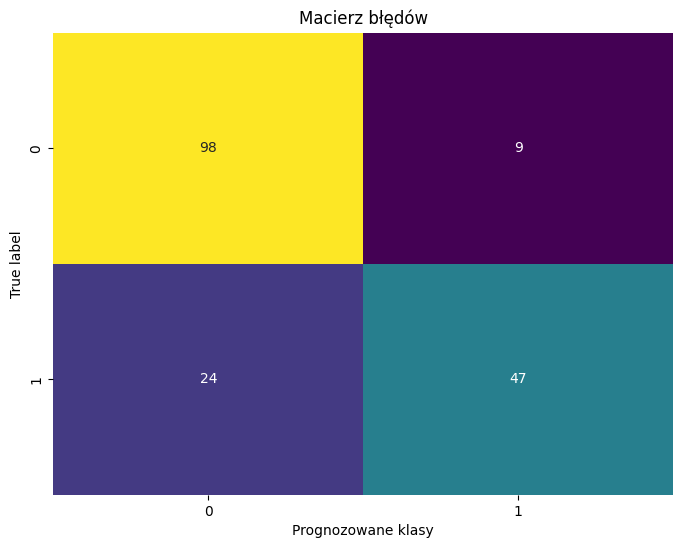

In [120]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.ylabel('True label')
plt.xlabel('Prognozowane klasy')
plt.title('Macierz błędów')
plt.show()

6.2. Krzywa ROC

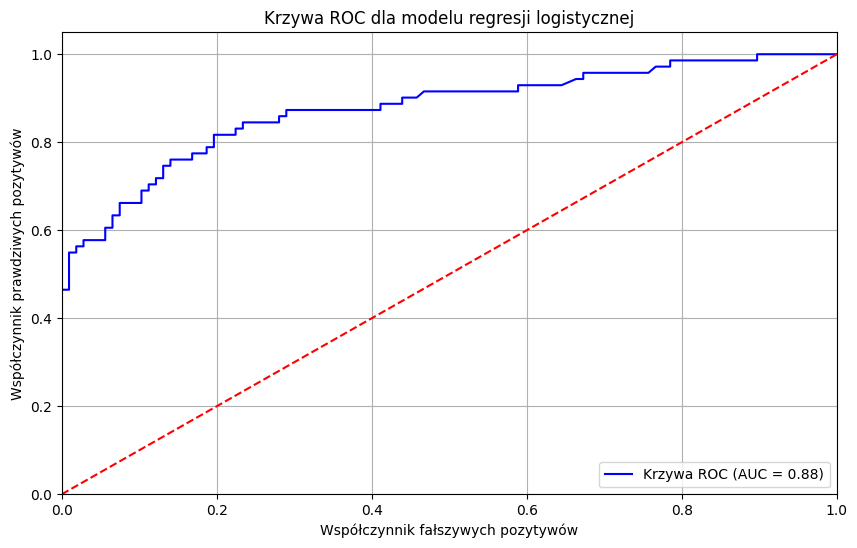

In [121]:
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Krzywa ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Współczynnik fałszywych pozytywów')
plt.ylabel('Współczynnik prawdziwych pozytywów')
plt.title('Krzywa ROC dla modelu regresji logistycznej')
plt.legend(loc='lower right')
plt.grid()
plt.show()

6.3. Krzywa czułość/precyzja

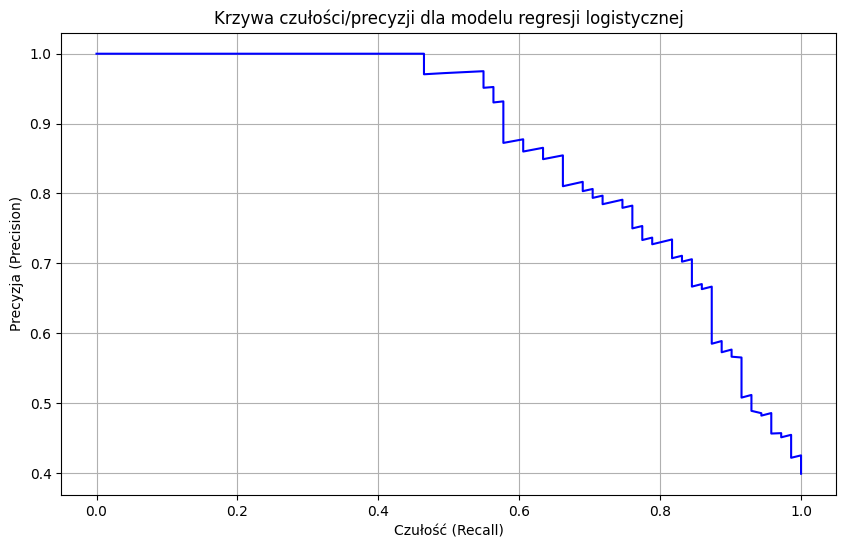

In [122]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Czułość (Recall)')
plt.ylabel('Precyzja (Precision)')
plt.title('Krzywa czułości/precyzji dla modelu regresji logistycznej')
plt.grid()
plt.show()

# Zadanie 2.

In [123]:
df = pd.read_csv('iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [124]:
print(df.describe())
print(df.isnull().values.any())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
False


2.4.  Wykres  punktowy  zależności  długości  płatka  w  funkcji  szerokości  płatka,  dane 
różnicowane za pomocą gatunku/rodzaju

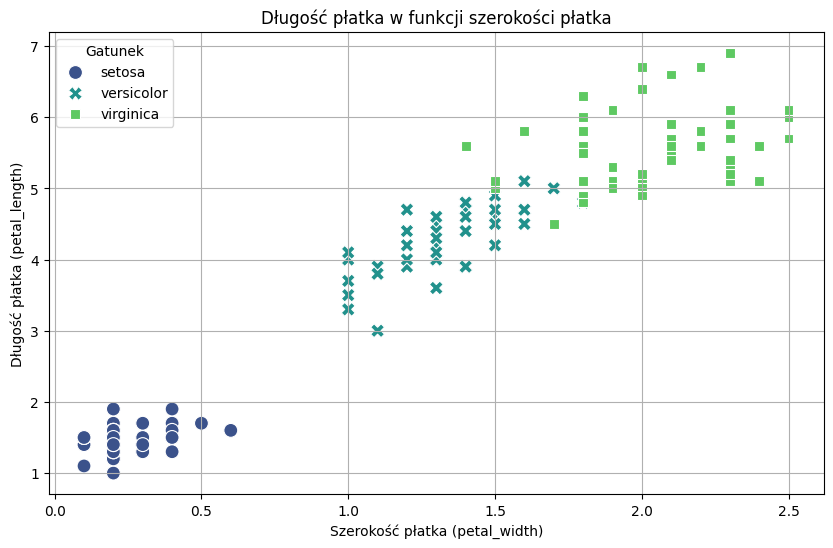

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal_width', y='petal_length', hue='species', style='species', palette='viridis', s=100)
plt.title('Długość płatka w funkcji szerokości płatka')
plt.xlabel('Szerokość płatka (petal_width)')
plt.ylabel('Długość płatka (petal_length)')
plt.legend(title='Gatunek')
plt.grid()
plt.show()

2.5.  Wykres  punktowy  zależności  długości  kielicha  w  funkcji  szerokości  kielicha,  dane 
różnicowane za pomocą gatunku/rodzaju.

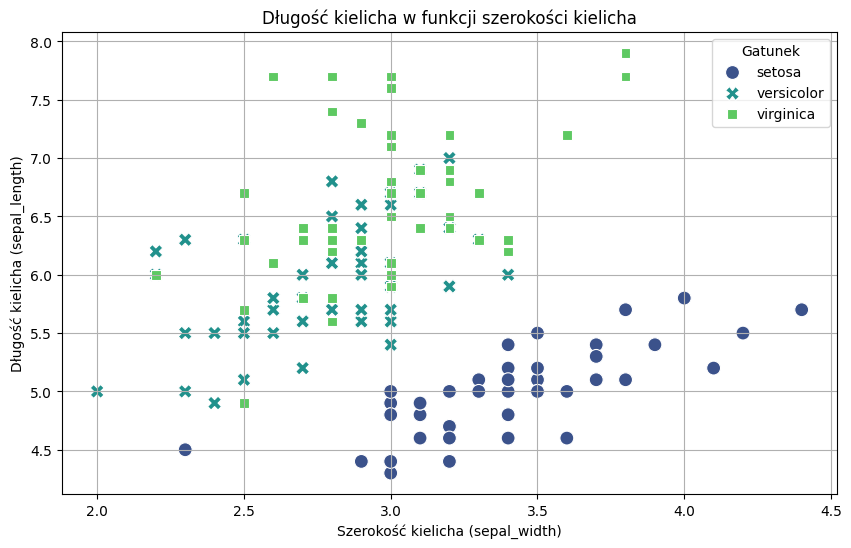

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_width', y='sepal_length', hue='species', style='species', palette='viridis', s=100)
plt.title('Długość kielicha w funkcji szerokości kielicha')
plt.xlabel('Szerokość kielicha (sepal_width)')
plt.ylabel('Długość kielicha (sepal_length)')
plt.legend(title='Gatunek')
plt.grid()
plt.show()

2.6.  Wykres  porównawczy  składający  się  z  macierzy  par  wszystkich  zmiennych, 
różnicowanych na podstawie kolumny 'species'.

<Figure size 1200x800 with 0 Axes>

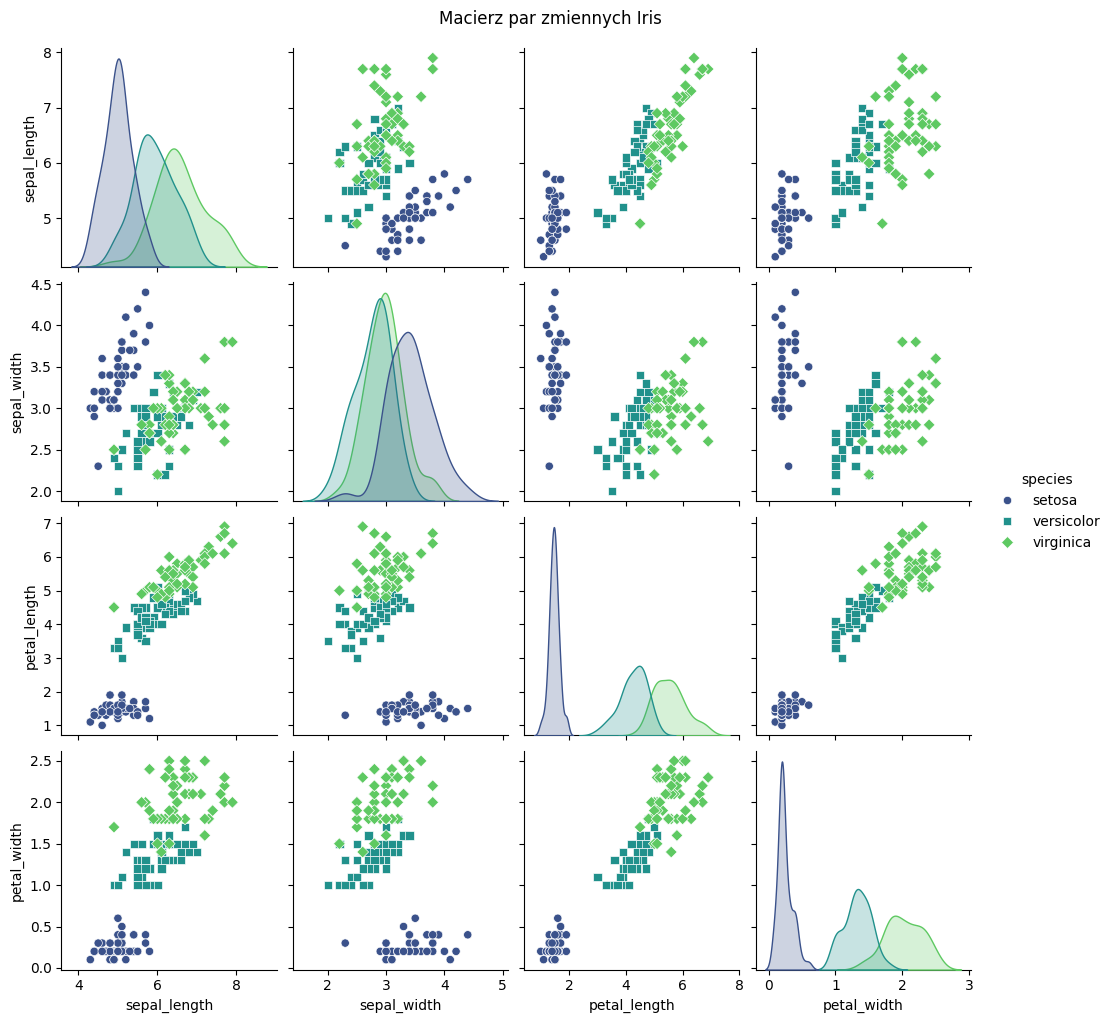

In [129]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', palette='viridis', markers=["o", "s", "D"])
plt.suptitle('Macierz par zmiennych Iris', y=1.02) 
plt.show()

2.7. Mapa (heatmapa) korelacji.

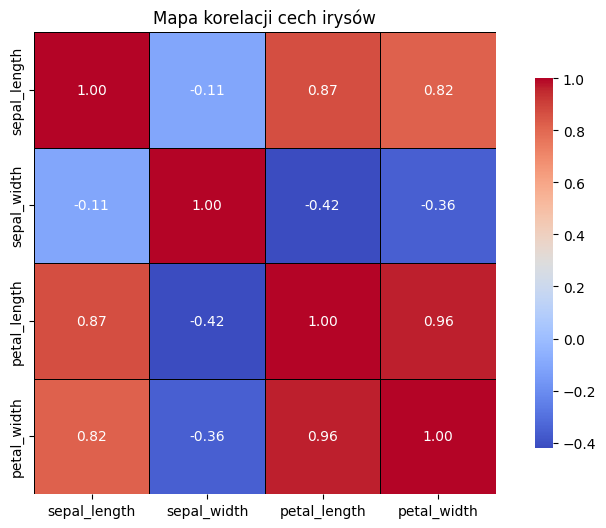

In [131]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()  # Obliczenie macierzy korelacji dla kolumn numerycznych
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, linewidths=.5, linecolor='black')
plt.title('Mapa korelacji cech irysów')
plt.show()